In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Mall_Customers.csv")
data.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.shape

(200, 5)

In [4]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
import missingno as msno

<Axes: >

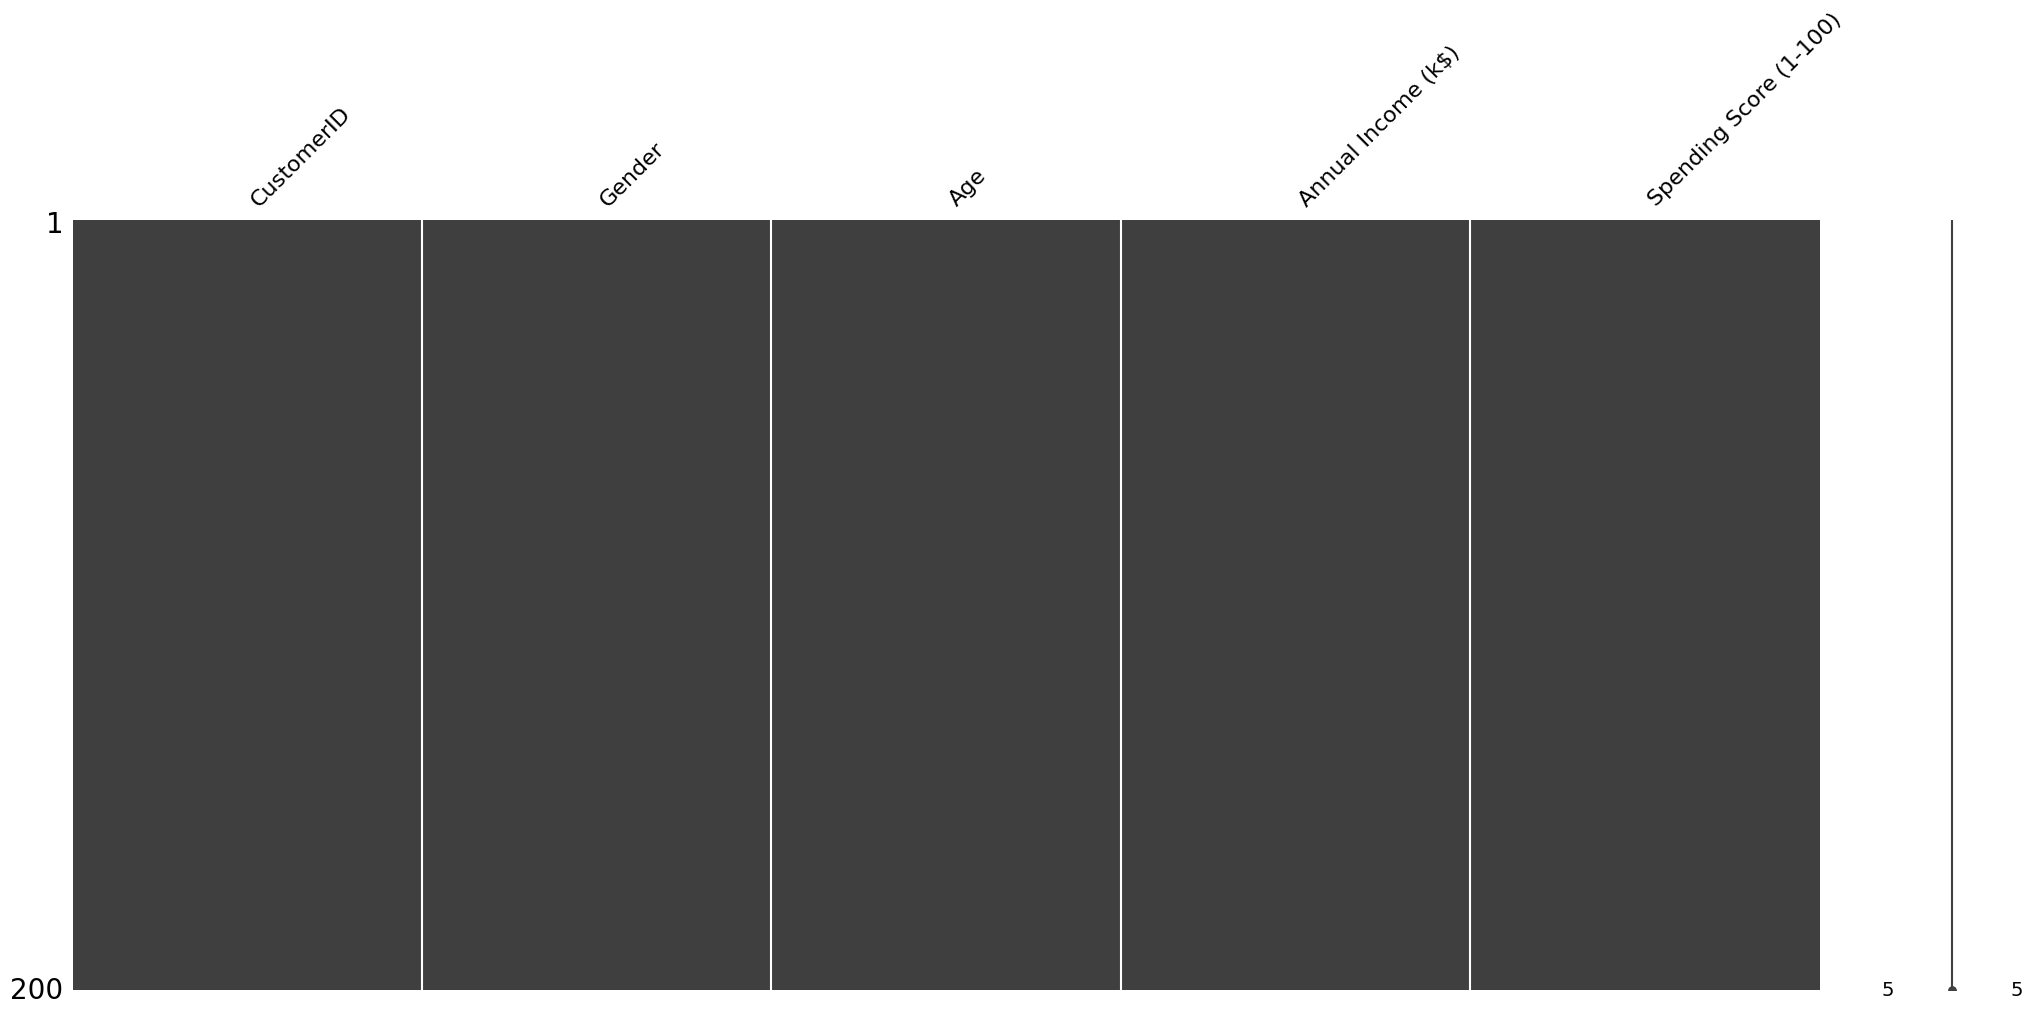

In [7]:
msno.matrix(data)

## Data Visulization & EDA

In [8]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [9]:
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

C:\Users\Hrishikesh Bharali\AppData\Local\Temp\ipykernel_15112\2801087657.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'])
C:\Users\Hrishikesh Bharali\AppData\Local\Temp\ipykernel_15112\2801087657.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Annual Income (k$)'])
C:\

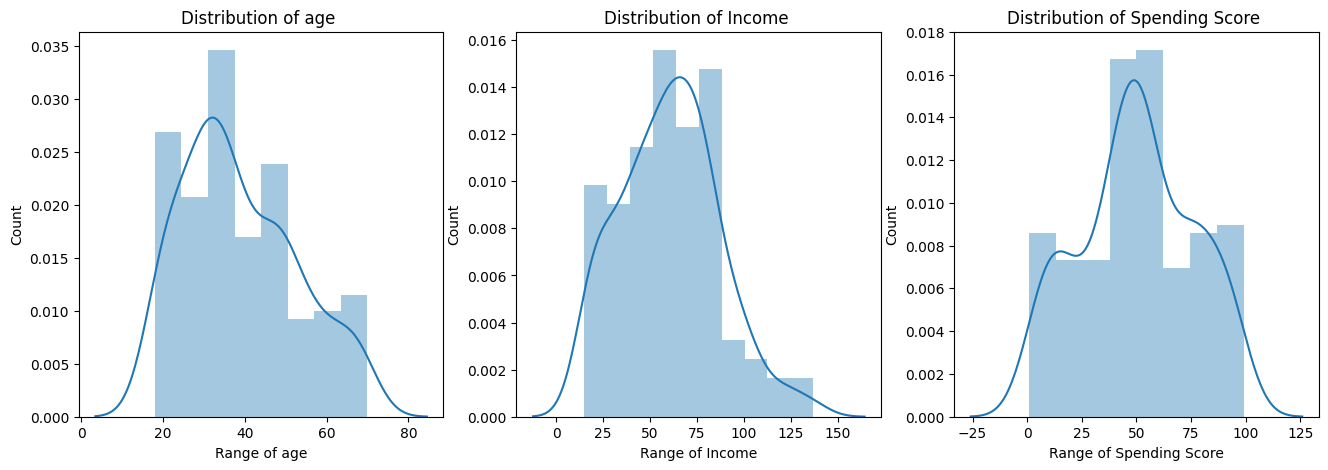

In [10]:
plt.figure(figsize = (16,5))
plt.subplot(1,3,1)
sns.distplot(data['Age'])
plt.title("Distribution of age ")
plt.xlabel("Range of age")
plt.ylabel("Count")

plt.subplot(1,3,2)
sns.distplot(data['Annual Income (k$)'])
plt.title("Distribution of Income ")
plt.xlabel("Range of Income")
plt.ylabel("Count")

plt.subplot(1,3,3)
sns.distplot(data['Spending Score (1-100)'])
plt.title("Distribution of Spending Score ")
plt.xlabel("Range of Spending Score")
plt.ylabel("Count")
plt.show()


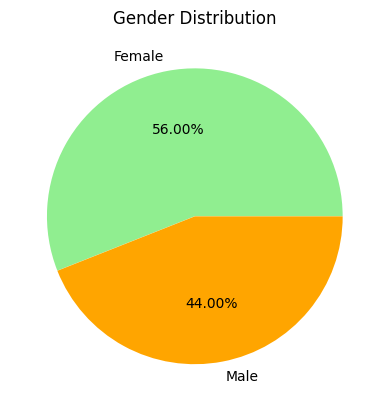

In [11]:
df = data.groupby('Gender').size()
df.plot(kind='pie',subplots = True,colors=['lightgreen','orange'],explode = [0,0.001],labels = ['Female','Male'],autopct = '%.2f%%')
plt.title("Gender Distribution")
plt.show()

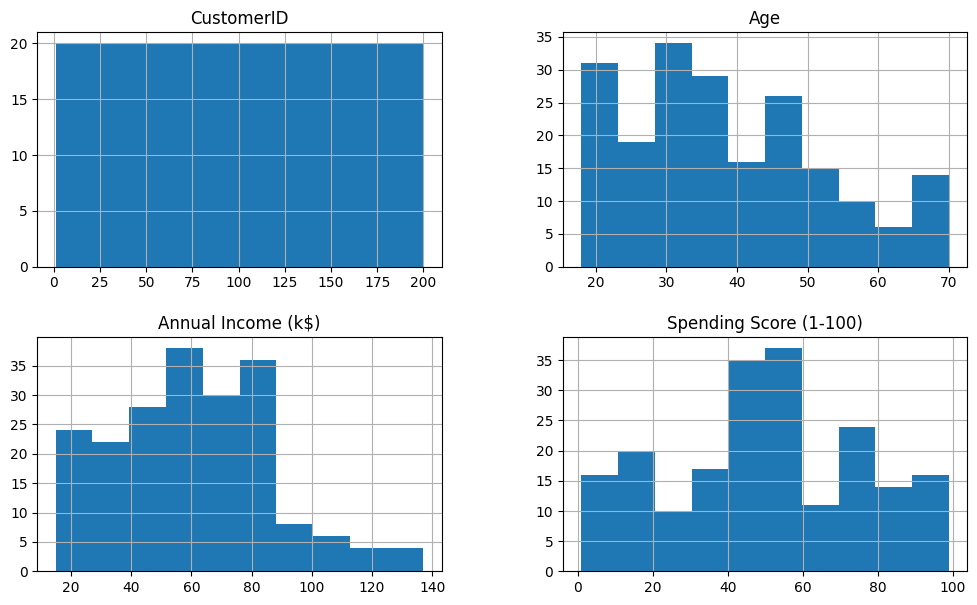

In [12]:
data.hist(figsize = (12,7))
plt.show()

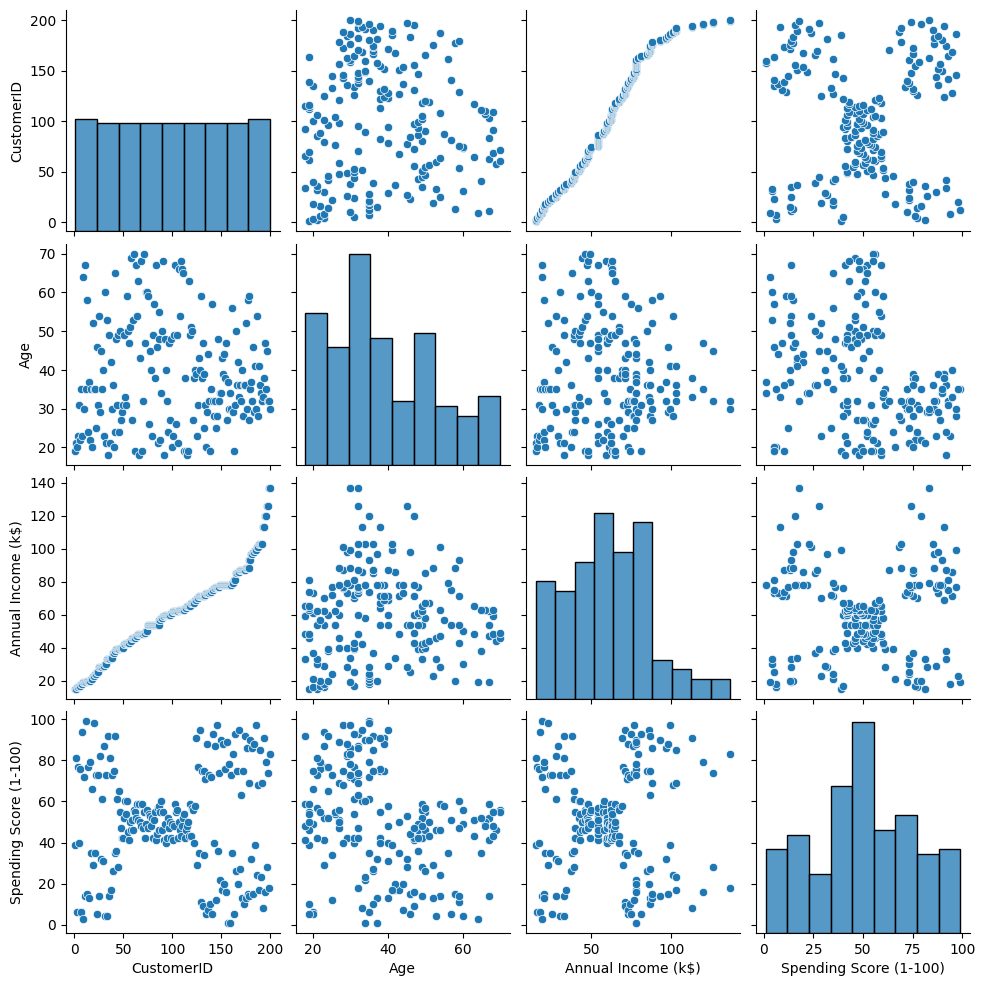

In [13]:
sns.pairplot(data)
plt.show()

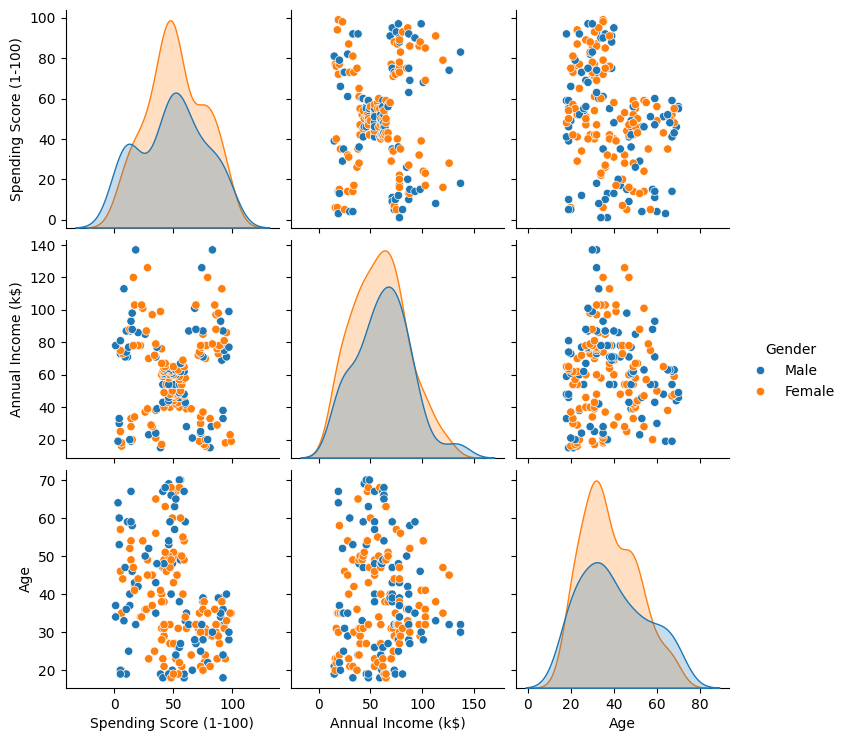

In [14]:
sns.pairplot(data,vars = [
       'Spending Score (1-100)','Annual Income (k$)','Age'],hue = 'Gender')

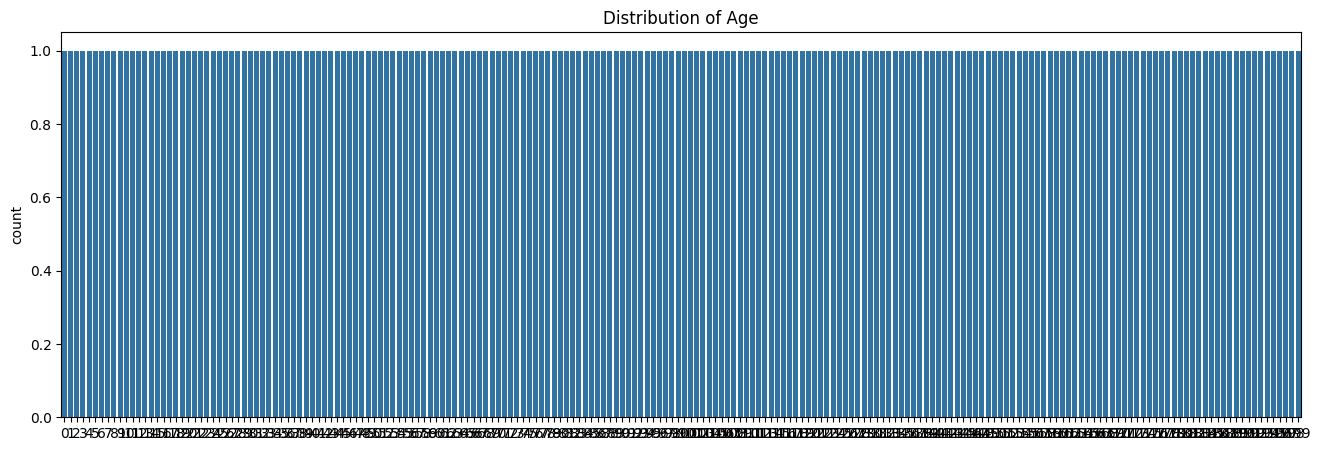

In [15]:
plt.figure(figsize = (16,5))
sns.countplot(data['Age'])
plt.title("Distribution of Age")
plt.show()

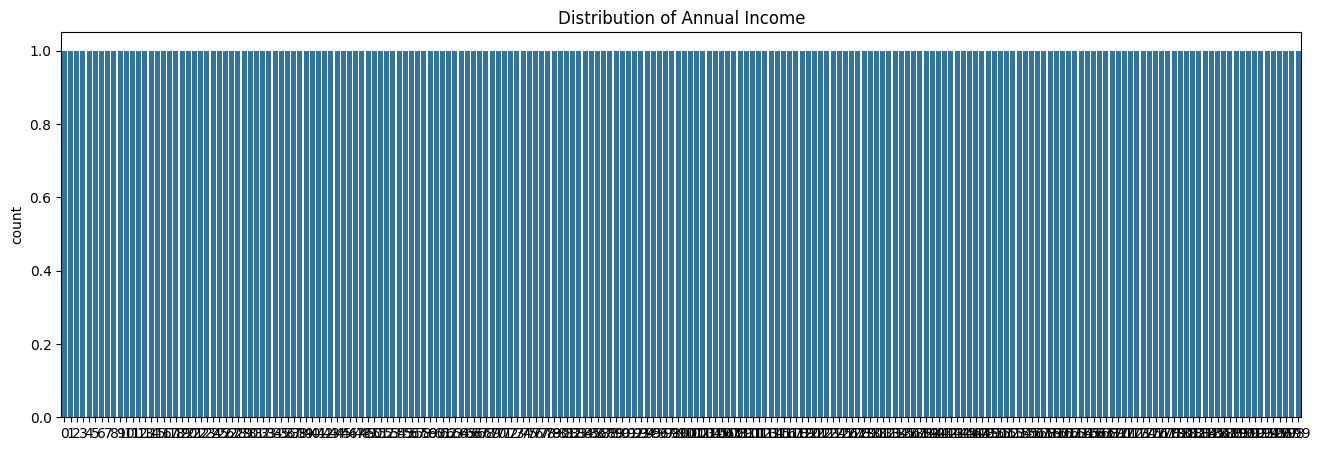

In [16]:
plt.figure(figsize = (16,5))
sns.countplot(data['Annual Income (k$)'])
plt.title("Distribution of Annual Income")
plt.show()

In [17]:
import dabl

Target looks like regression


AttributeError: 'Legend' object has no attribute 'legendHandles'

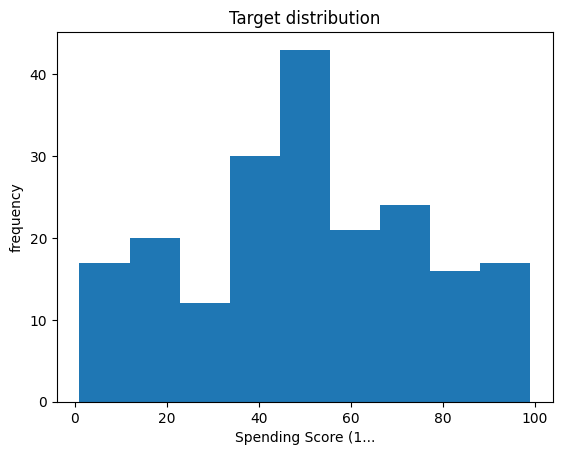

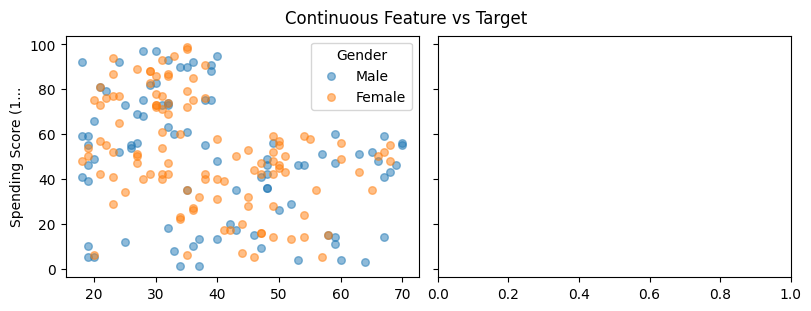

In [18]:
dabl.plot(data,target_col = 'Spending Score (1-100)')

Target looks like regression


AttributeError: 'Legend' object has no attribute 'legendHandles'

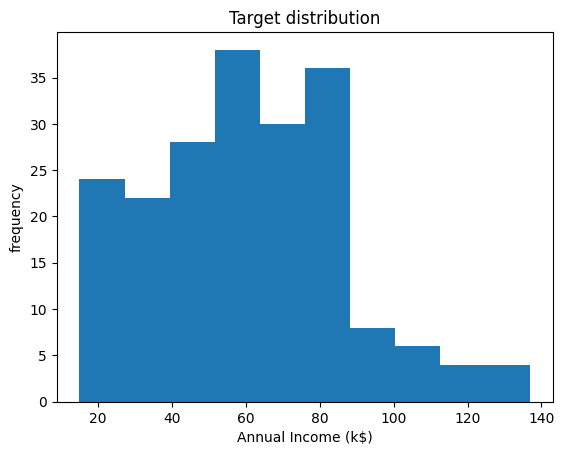

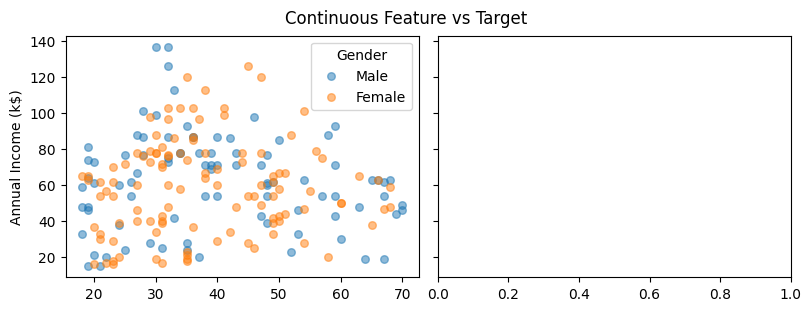

In [19]:
dabl.plot(data,target_col = 'Annual Income (k$)')

In [20]:
sns.heatmap(data.corr(),annot = True)

ValueError: could not convert string to float: 'Male'

In [ ]:
for gender in ['Male','Female']:
    plt.scatter(x = 'Age',y = 'Annual Income (k$)',
               data = data[data['Gender'] == gender],s = 200, alpha = 0.5,label = gender)
    plt.xlabel("Age")
    plt.ylabel("Annual Income")
    plt.title("Age vs Annual Income")
    plt.legend()
    plt.show()

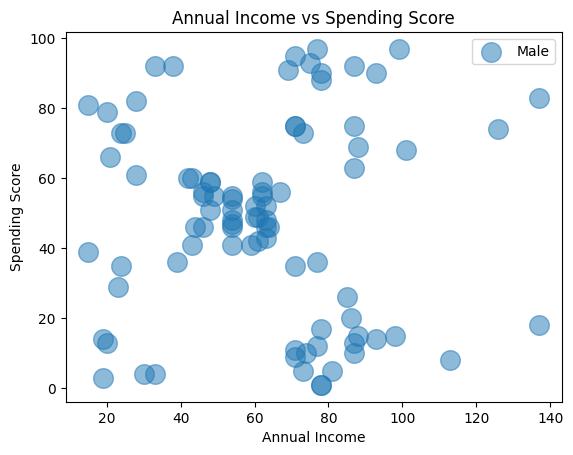

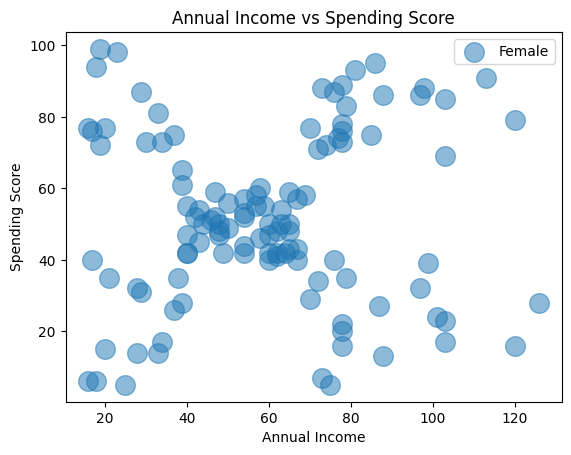

In [21]:
for gender in ['Male','Female']:
    plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',
               data = data[data['Gender'] == gender],s = 200, alpha = 0.5,label = gender)
    plt.xlabel("Annual Income")
    plt.ylabel("Spending Score")
    plt.title("Annual Income vs Spending Score")
    plt.legend()
    plt.show()

## K-means clustering

In [22]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [23]:
x = data.iloc[:,[3,4]].values

In [24]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [25]:
from sklearn.cluster import KMeans

In [34]:

k = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,init = 'k-means++',random_state = 0)
    kmeans.fit(x)
    k.append(kmeans.inertia_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

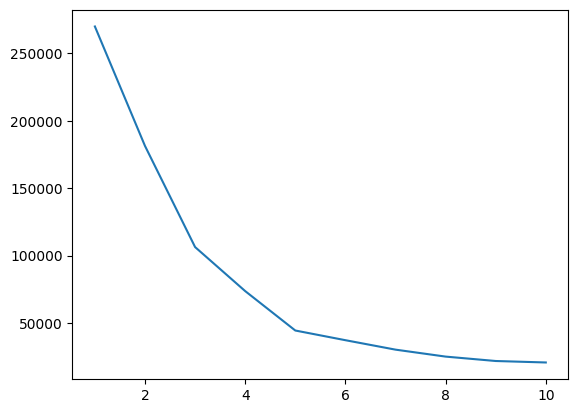

In [27]:
plt.plot(range(1,11),k)
plt.show()

In [30]:
kmeans = KMeans(n_clusters=5)
label = kmeans.fit_predict(x)
print(label)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 1 4 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 3 0 1 0 3 0 3 0 1 0 3 0 3 0 3 0 3 0 1 0 3 0 3 0
 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0]


In [31]:
print(kmeans.cluster_centers_)

[[86.53846154 82.12820513]
 [55.2962963  49.51851852]
 [25.72727273 79.36363636]
 [88.2        17.11428571]
 [26.30434783 20.91304348]]


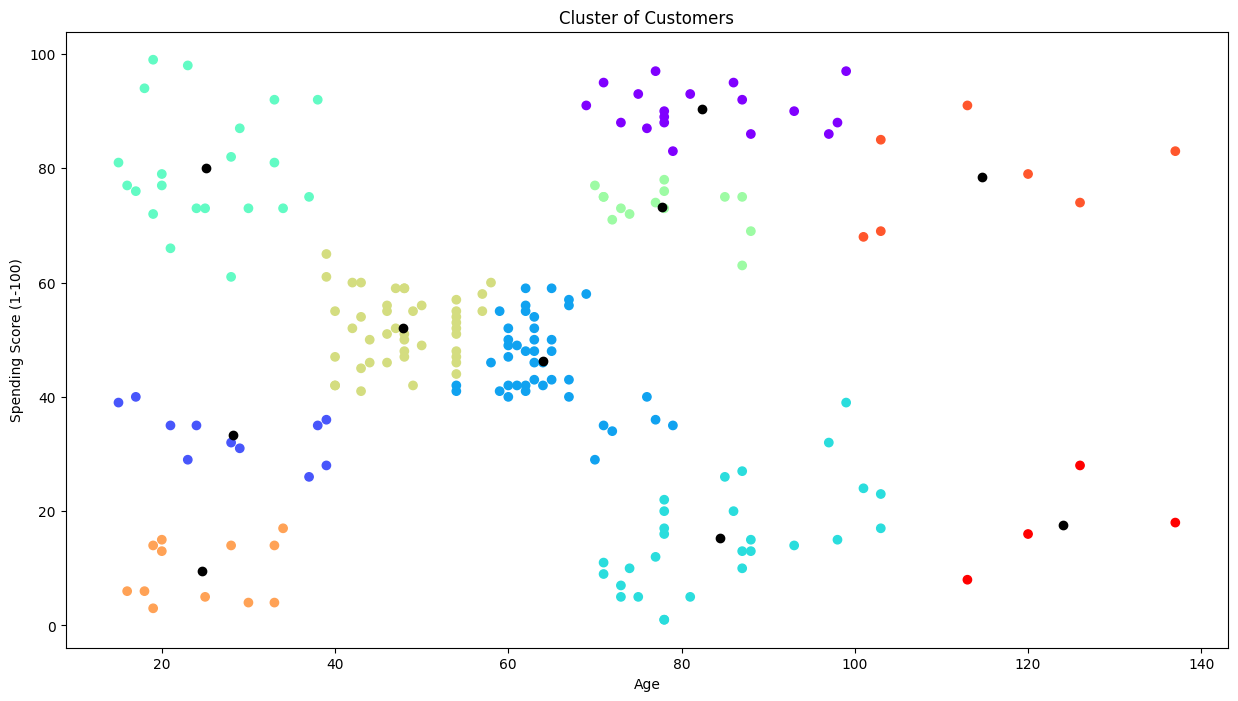

In [37]:
plt.figure(1 , figsize = (15 , 8))
plt.scatter(x[:,0],x[:,1],c=kmeans.labels_,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.title('Cluster of Customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

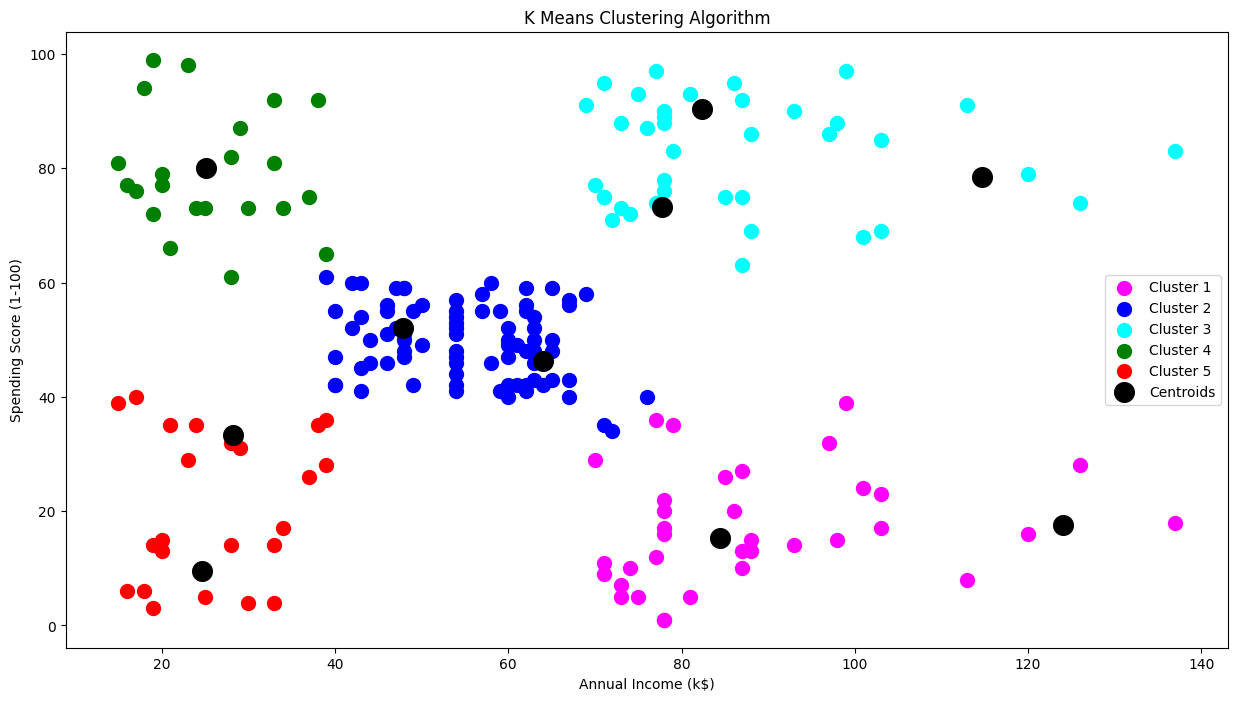

In [36]:
plt.figure(1 , figsize = (15 , 8))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'magenta', label = 'Cluster 1') ### Cluster 1
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')  ## Cluster 2
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'cyan', label = 'Cluster 3')  ## Cluster 3
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'green', label = 'Cluster 4')  ## Cluster 4
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 100, c = 'red', label = 'Cluster 5')   ## Cluster 5
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'black', label = 'Centroids')
plt.title('K Means Clustering Algorithm')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()